In [5]:
import os
from glob import glob
import argparse
from pathlib import Path
import yaml

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from PIL import Image
from iglovikov_helper_functions.config_parsing.utils import object_from_dict

#
# def get_args():
#     parser = argparse.ArgumentParser()
#     arg = parser.add_argument
#     arg("-c", "--config_path", type=Path, help="Path to the config.", required=True)
#     return parser.parse_args()
#
#
# config_path = 'retinaface/configs/2020-07-20.yaml'
# with open(config_path) as f:
#     hparams = yaml.load(f, Loader=yaml.SafeLoader)
#

In [6]:
# # setup paths for train/test images
# hparams['train_image_path']
# hparams['test_image_path']
# hparams['train_annotation_path']
#
# train_fns = glob(hparams['train_image_path'] + '/*')test_fns = glob(hparams['test_image_path'] + '/*')
#

In [3]:
# print('Number of train images is {}'.format(len(train_fns)))
# print('Number of test images is {}'.format(len(test_fns)))
#

In [4]:
# train = pd.read_csv(hparams['train_annotation_path'])
#
# # dataframe with all images
# train_images = pd.DataFrame([Path(fns).stem for fns in train_fns])
# train_images.columns = ['image_id']
# # merge train images with bounding boxes
# train_images = train_images.merge(train, on='image_id', how='left')
# print('images without bounding boxes %d' % train_images.bbox.isnull().sum())
# # replace nan values
# train_images.bbox = train_images.bbox.fillna('[0,0,0,0]')
# # split bbox column
# bbox_items = train_images.bbox.str.split(',', expand=True)
# train_images['bbox_xmin'] = bbox_items[0].str.strip('[ ').astype(float)
# train_images['bbox_ymin'] = bbox_items[1].str.strip(' ').astype(float)
# train_images['bbox_width'] = bbox_items[2].str.strip(' ').astype(float)
# train_images['bbox_height'] = bbox_items[3].str.strip(' ]').astype(float)
# # check if null bounding boxes still exist
# # train_images[train_images.bbox == '[0,0,0,0]']
# train_images.head(3)
#

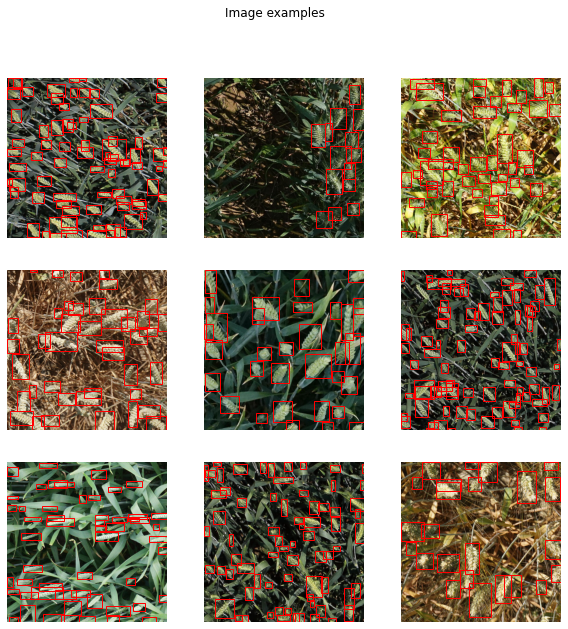

In [85]:
# def get_all_bboxes(df, image_id):
#     image_bboxes = df[df.image_id == image_id]
#     bboxes = []
#     for _, row in image_bboxes.iterrows():
#         bboxes.append((row.bbox_xmin, row.bbox_ymin, row.bbox_width, row.bbox_height))
#     return bboxes
#
# def plot_image_examples(df, rows=3, cols=3, title='Image examples'):
#     fig, axs = plt.subplots(rows, cols, figsize=(10,10))
#     for row in range(rows):
#         for col in range(cols):
#             idx = np.random.randint(len(df), size=1)[0]
#             img_id = df.iloc[idx].image_id
#
#             img = Image.open(os.path.join(hparams['train_image_path'], img_id + '.jpg'))
#             axs[row, col].imshow(img)
#
#             bboxes = get_all_bboxes(df, img_id)
#             for bbox in bboxes:
#                 rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3],linewidth=1,edgecolor='r',facecolor='none')
#                 axs[row, col].add_patch(rect)
#
#             axs[row, col].axis('off')
#
#     plt.suptitle(title)
#
# plot_image_examples(train_images)
#

In [7]:
# # compute the number of bounding boxes per train image
# train_images['count'] = train_images.apply(lambda row: 1 if np.isfinite(row.width) else 0, axis=1)
# train_images_count = train_images.groupby('image_id').sum().reset_index()
#

In [8]:
# from bokeh.plotting import figure
# from bokeh.io import output_notebook, show, output_file
# from bokeh.models import ColumnDataSource, HoverTool, Panel
# from bokeh.models.widgets import Tabs
#
#
# def hist_hover(dataframe, column, colors=["#94c8d8", "#ea5e51"], bins=30, title=''):
#     hist, edges = np.histogram(dataframe[column], bins=bins)
#
#     hist_df = pd.DataFrame({column: hist,
#                             "left": edges[:-1],
#                             "right": edges[1:]})
#     hist_df["interval"] = ["%d to %d" % (left, right) for left, right in zip(hist_df["left"], hist_df["right"])]
#
#     src = ColumnDataSource(hist_df)
#     plot = figure(plot_height=400, plot_width=600, title=title, x_axis_label=column, y_axis_label="Count")
#     plot.quad(bottom=0, top=column, left="left", right="right", source=src, fill_color = colors[0],
#               line_color="#35838d", fill_alpha=0.7, hover_fill_alpha=0.7, hover_fill_color=colors[1])
#
#     hover = HoverTool(tooltips=[('Interval', '@interval'), ('Count', str("@" + column))])
#     plot.add_tools(hover)
#
#     output_notebook()
#     show(plot)#%%
#
# hist_hover(train_images_count, 'count', title='Number of wheat spikes per image')
#

In [9]:
# # plot with less than 10 spikes
# less_spikes_ids = train_images_count[train_images_count['count'] < 10].image_id
# plot_image_examples(train_images[train_images.image_id.isin(less_spikes_ids)], title='Example images with small number of spikes')
#

In [10]:
# # plot with more than 100 spikes
# many_spikes_ids = train_images_count[train_images_count['count'] > 100].image_id
# plot_image_examples(train_images[train_images.image_id.isin(many_spikes_ids)], title='Example images with large number of spikes')
#

In [11]:
# # compute bounding box areas
# train_images['bbox_area'] = train_images['bbox_width'] * train_images['bbox_height']
#

In [12]:
# # plot a histogram of bounding box areas
# hist_hover(train_images, 'bbox_area', title='Area of a single bounding box')
#

In [13]:
# max_area = train_images.bbox_area.max()
# print('The biggest bounding box area is {}'.format(max_area))
#

In [14]:
# large_boxes_ids = train_images[train_images['bbox_area'] > 300000].image_id
# plot_image_examples(train_images[train_images.image_id.isin(large_boxes_ids)], title='Example images with large bbox area')
#

In [15]:
# min_area = train_images[train_images['bbox_area'] > 0].bbox_area.min()
# print('The smallest bounding box area is {}'.format(min_area))
#

In [16]:
# small_boxes_ids = train_images[(train_images['bbox_area'] < 50) & (train_images['bbox_area'] > 0)].image_id
# plot_image_examples(train_images[train_images.image_id.isin(small_boxes_ids)], title='Example images with large bbox area')
#

In [17]:
# # compute the total bounding boxes area per image
# area_per_image = train_images.groupby(by='image_id').sum().reset_index()
#
# # compute the percentage of the image area covered by bounding boxes
# area_per_image_percentage = area_per_image.copy()
# area_per_image_percentage['bbox_area'] = area_per_image_percentage['bbox_area'] / (1024 * 1024) * 100
#

In [18]:
# hist_hover(area_per_image_percentage, 'bbox_area', title='Percentage of image area covered by bounding boxes')
#

In [19]:
# train_images.head()
#

In [20]:
# train_images[train_images.bbox_area > 30000]
#

In [21]:
# train_images[train_images.bbox_area > 100000].head()
#
# # plot_image_examples(train_images[train_images.bbox_area > 100000], title='Example images with small number of spikes')
# # train_images[train_images.bbox_area > 100000].shape
#

In [22]:
# np.percentile(train_images.bbox_area, 100)


In [ ]:
# [
#   {
#     "file_name": "0--Parade/0_Parade_marchingband_1_849.jpg",
#     "annotations": [
#       {
#         "x_min": 449,
#         "y_min": 330,
#         "width": 122,
#         "height": 149,
#         "landmarks": [
#           488.906,1
#           373.643,
#           0.0,
#           542.089,
#           376.442,
#           0.0,
#           515.031,
#           412.83,
#           0.0,
#           485.174,
#           425.893,
#           0.0,
#           538.357,
#           431.491,
#           0.0,
#           0.82
#         ]
#       }
#     ]
#   },
# ]
#

In [52]:
# import argparse
# import os
# from pathlib import Path
# from glob import glob
# import yaml
#
# from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np
# import cv2
#
#
# config_path = 'retinaface/configs/2020-07-20.yaml'
# with open(config_path) as f:
#     hparams = yaml.load(f, Loader=yaml.SafeLoader)
#
#
# def get_args():
#     parser = argparse.ArgumentParser()
#     arg = parser.add_argument
#     arg("-c", "--config_path", type=Path, help="Path to the config.", required=True)
#     return parser.parse_args()
#
#
# # HELPERS FOR DATA PREPROCESSING
#
#
# def split_bbox_column(images: pd.DataFrame):
#     """ split bbox column """
#     images = images.copy()
#     bbox_items = images.bbox.str.split(',', expand=True)
#     images['bbox_xmin'] = bbox_items[0].str.strip('[ ').astype(float)
#     images['bbox_ymin'] = bbox_items[1].str.strip(' ').astype(float)
#     images['bbox_width'] = bbox_items[2].str.strip(' ').astype(float)
#     images['bbox_height'] = bbox_items[3].str.strip(' ]').astype(float)
#     return images
#
#
# def get_image_brightness(image):
#     # convert to grayscale
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     # get average brightness
#     return np.array(gray).mean()
#
#
# def get_percentage_of_green_pixels(image):
#     # convert to HSV
#     hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
#
#     # get the green mask
#     hsv_lower = (40, 40, 40)
#     hsv_higher = (70, 255, 255)
#     green_mask = cv2.inRange(hsv, hsv_lower, hsv_higher)
#
#     return float(np.sum(green_mask)) / 255 / (1024 * 1024)
#
#
# def get_percentage_of_yellow_pixels(image):
#     # convert to HSV
#     hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
#
#     # get the green mask
#     hsv_lower = (25, 40, 40)
#     hsv_higher = (35, 255, 255)
#     yellow_mask = cv2.inRange(hsv, hsv_lower, hsv_higher)
#
#     return float(np.sum(yellow_mask)) / 255 / (1024 * 1024)
#
#
# def add_features(df):
#     brightness = []
#     green = []
#     yellow = []
#     for _, row in df.iterrows():
#         img_id = row.image_id
#         image = cv2.imread(os.path.join(hparams['train_image_path'], img_id + '.jpg'))
#         brightness.append(get_image_brightness(image))
#         green.append(get_percentage_of_green_pixels(image))
#         yellow.append(get_percentage_of_yellow_pixels(image))
#
#     features_df = pd.DataFrame([brightness, green, yellow]).T
#     features_df.columns = ['brightness', 'green_pixels', 'yellow_pixels']
#     df = pd.concat([df, features_df], ignore_index=True, axis=1)
#     df.columns = ['image_id', 'brightness', 'green_pixels', 'yellow_pixels']
#     return df
#
#     # brightness_df = pd.DataFrame(brightness)
#     # brightness_df.columns = ['brightness']
#     # df = pd.concat([df, brightness_df], ignore_index=True, axis=1)
#     # df.columns = ['image_id', 'brightness']
#     # return df
#
#
# def stratified_split_by_col(df, col, bin=20):
#     # digitize brightness for stratification
#     bins = np.linspace(df[col].min(), df[col].max(), bin)
#     y_binned = np.digitize(df[col], bins)
#
#     # Verify the minimum number of groups for any class cannot be less than 2
#     values, counts = np.unique(y_binned, return_counts=True)
#     np.random.seed(hparams['seed'])
#     # train_test_split will raise the error in case bin counts - 1
#     for value in values[np.argwhere(counts == 1)]:
#         ind = np.random.randint(0, len(y_binned), 10)
#         y_binned[ind] = value
#
#
#     train_df, test_df = train_test_split(df, test_size=0.03, random_state=hparams['seed'], stratify=y_binned)
#     return train_df, test_df
#
#
# train_fns = glob(hparams['train_image_path'] + '/*')
# test_fns = glob(hparams['test_image_path'] + '/*')
#
# train = pd.read_csv(hparams['train_annotation_path'])
#
# # dataframe with all images
# train_images = pd.DataFrame([Path(fns).stem for fns in train_fns])
# train_images.columns = ['image_id']
#
# train_images = train_images.merge(train, on='image_id', how='left')
# train_images.bbox = train_images.bbox.fillna('[0,0,0,0]')
#
# train_images = split_bbox_column(train_images)
#
# train_images['bbox_area'] = train_images['bbox_width'] * train_images['bbox_height'] / (1024 * 1024)
#
# # add brightness to the dataframe
# images_df = pd.DataFrame(train_images.image_id.unique())
# images_df.columns = ['image_id']
# # brightness_df = add_brightness(images_df)
# features_df = add_features(images_df)
# train_df1, val_df1 = stratified_split_by_col(features_df[['image_id', 'brightness']], 'brightness')
# train_df2, val_df2 = stratified_split_by_col(features_df[['image_id', 'green_pixels']], 'green_pixels')
# train_df3, val_df3 = stratified_split_by_col(features_df[['image_id', 'yellow_pixels']], 'yellow_pixels')
#
# # digitize brightness for stratification
# # train_df1, val_df1 = stratified_split_by_col(brightness_df, 'brightness')
#
#
# # train_images = train_images.merge(brightness_df, on='image_id')
#
# # nobbox_inds = train_images.bbox_area == 0
# # bigbbox_inds = train_images.bbox_area > 0.1
#

In [50]:
# train_df1.shape, val_df1.shape
#

((3319, 2), (103, 2))

In [54]:
# val_df1.shape, val_df2.shape, val_df3.shape
#

((103, 2), (103, 2), (103, 2))

(49,)

In [65]:
# inds = pd.concat([val_df1.image_id, val_df2.image_id, val_df3.image_id,
#            train_images[train_images.bbox_area == 0].image_id,
#            train_images[train_images.bbox_area > 0.1].image_id,
#            ], ignore_index=True, axis=0).unique()
#

In [69]:
# train_images[train_images.image_id.isin(inds)].shape
#

(12759, 10)

In [71]:
# train_images.head()
#

,image_id,width,height,bbox,source,bbox_xmin,bbox_ymin,bbox_width,bbox_height,bbox_area
0,75d62c43e,1024.0,1024.0,"[863.0, 741.0, 132.0, 67.0]",arvalis_3,863.0,741.0,132.0,67.0,0.008434
1,75d62c43e,1024.0,1024.0,"[844.0, 980.0, 133.0, 44.0]",arvalis_3,844.0,980.0,133.0,44.0,0.005581
2,75d62c43e,1024.0,1024.0,"[736.0, 798.0, 68.0, 63.0]",arvalis_3,736.0,798.0,68.0,63.0,0.004086
3,75d62c43e,1024.0,1024.0,"[825.0, 630.0, 137.0, 68.0]",arvalis_3,825.0,630.0,137.0,68.0,0.008884
4,75d62c43e,1024.0,1024.0,"[853.0, 223.0, 152.0, 142.0]",arvalis_3,853.0,223.0,152.0,142.0,0.020584


In [74]:
# train_images.iloc[:200].shape
#

(200, 10)

In [75]:
# def toformat(df):
#     data = []
#     for img_id, group_df in df.groupby('image_id'):
#         image_data = {img_id: os.path.join(hparams['train_image_path'], img_id + '.jpg')}
#         annotations = []
#         for row_index, row in group_df.iterrows():
#             annotation_data = {
#                 'x_min': row.bbox_xmin,
#                 'y_min': row.bbox_ymin,
#                 'width': row.bbox_width,
#                 'height': row.bbox_height,
#             }
#             annotations.append(annotation_data)
#         image_data['annotations'] = annotations
#         data.append(image_data)
#     return data
#
#
# images = toformat(train_images.iloc[:200])
#

In [76]:
# images[0]
#

{'0d5525a7b': '/home/beefmilf/PycharmProjects/wheatDet/data/train/0d5525a7b.jpg',
 'annotations': [{'x_min': 259.0,
   'y_min': 374.0,
   'width': 117.0,
   'height': 127.0},
  {'x_min': 343.0, 'y_min': 394.0, 'width': 90.0, 'height': 261.0},
  {'x_min': 710.0, 'y_min': 222.0, 'width': 110.0, 'height': 113.0},
  {'x_min': 437.0, 'y_min': 155.0, 'width': 75.0, 'height': 307.0},
  {'x_min': 13.0, 'y_min': 518.0, 'width': 117.0, 'height': 130.0},
  {'x_min': 785.0, 'y_min': 194.0, 'width': 110.0, 'height': 160.0},
  {'x_min': 10.0, 'y_min': 607.0, 'width': 105.0, 'height': 171.0},
  {'x_min': 643.0, 'y_min': 0.0, 'width': 130.0, 'height': 2.0},
  {'x_min': 822.0, 'y_min': 370.0, 'width': 159.0, 'height': 86.0},
  {'x_min': 178.0, 'y_min': 583.0, 'width': 69.0, 'height': 66.0},
  {'x_min': 486.0, 'y_min': 339.0, 'width': 68.0, 'height': 200.0},
  {'x_min': 424.0, 'y_min': 549.0, 'width': 39.0, 'height': 43.0},
  {'x_min': 172.0, 'y_min': 660.0, 'width': 49.0, 'height': 40.0},
  {'x_min': 3

In [79]:
# import os
# from glob import glob
# import argparse
# from pathlib import Path
# import yaml
# import json
#
#
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import patches
# from PIL import Image
# from iglovikov_helper_functions.config_parsing.utils import object_from_dict
#
#
# def get_args():
#     parser = argparse.ArgumentParser()
#     arg = parser.add_argument
#     arg("-c", "--config_path", type=Path, help="Path to the config.", required=True)
#     return parser.parse_args()
#
#
# def save_file(data, fname):
#     with open(fname, 'w') as f:
#         json.dump(data, f)
#
#
# config_path = 'retinaface/configs/2020-07-20.yaml'
# with open(config_path) as f:
#     hparams = yaml.load(f, Loader=yaml.SafeLoader)
#
# new_data = None
# with open(hparams['train_annotation_path']) as f:
#     data = json.load(f)
#     new_data = []
#     for i in data:
#         k = list(i.keys())[0]
#         i['file_name'] = i[k]
#         del i[k]
#         new_data.append(i)
# save_file(new_data, hparams['train_annotation_path'])
#
# new_data = None
# with open(hparams['val_annotation_path']) as f:
#     data = json.load(f)
#     new_data = []
#     for i in data:
#         k = list(i.keys())[0]
#         i['file_name'] = i[k]
#         del i[k]
#         new_data.append(i)
# save_file(new_data, hparams['val_annotation_path'])
#

In [3]:
# import os
# from glob import glob
# import argparse
# from pathlib import Path
# import yaml
# import json
#
#
# import pandas as pd
# import numpy as np
#
#
# def get_args():
#     parser = argparse.ArgumentParser()
#     arg = parser.add_argument
#     arg("-c", "--config_path", type=Path, help="Path to the config.", required=True)
#     return parser.parse_args()
#
#
# def save_file(data, fname):
#     with open(fname, 'w') as f:
#         json.dump(data, f)
#
#
# config_path = 'retinaface/configs/2020-07-20.yaml'
# with open(config_path) as f:
#     hparams = yaml.load(f, Loader=yaml.SafeLoader)
#
# new_data = None
# with open(hparams['train_annotation_path']) as f:
#     data = json.load(f)
#     print(len(data))
#

3046


In [7]:
# for img in data:
#     for annot in img['annotations']:
#         x_min, y_min, x_max, y_max = annot['bbox']
#         if x_max - x_min < 1.5 or y_max - y_min < 1.5:
#             print(img['file_name'], annot['bbox'])

/home/beefmilf/PycharmProjects/wheatDet/data/train/af9b3c251.jpg [1023.0, 774.0, 1024.0, 965.0]
/home/beefmilf/PycharmProjects/wheatDet/data/train/d0912a485.jpg [1019.0, 1023.0, 1021.0, 1024.0]
